## The objective of the dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database.

**The Pima Indian Diabetes data set consists of:**

**Pregnancies:** Number of times pregnant <br>
**Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>
**BloodPressure:** Diastolic blood pressure (mm Hg) <br>
**SkinThickness:** Triceps skin fold thickness (mm) <br>
**Insulin:** 2-Hour serum insulin (mu U/ml) <br>
**BMI:** Body mass index (weight in kg/(height in m)^2) <br>
**DiabetesPedigreeFunction:** Diabetes pedigree function <br>
**Age:** Age (years) <br>
**Outcome:** Class variable (0 or 1) 268 of 768 are 1, the others are 0 <br>

In [2]:
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler,StandardScaler
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, ConfusionMatrixDisplay, f1_score,confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib import rcParams
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
warnings.simplefilter(action="ignore")
%matplotlib inline

In [3]:
#reading the data set
df = pd.read_csv('diabetes.csv', encoding= 'unicode_escape')

# 1. Exploratory Data Analysis

In [4]:
# To display the top 5 rows
df.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# total number of rows and columns
# Dataset comprises of 768 observations and 9 characteristics.
# Out of which one is dependent variable and rest 8 are independent variables
df.shape

(768, 9)

In [6]:
# Data has only float and integer values
# No variable column has null/missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome'],
      dtype='object')

In [8]:
# Getting various summary statistics
# There is notably a large difference between 75% and max values of predictors “Insulin”,”SkinThickness”,”DiabetesPedigreeFunction”
# There might be extreme values/Outliers in our data set
df.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
#Looking at the percentage distribution of outcome variable
df.Outcome.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [11]:
# 65% of 0s and 35% of 1s- is the distribution of dependent variable. Not too unbalanced. 

## 1.1 Checking for Missing values, outliers and bivariate analysis

In [12]:
feature_names = ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
                 'BMI', 'Diabetes Pedigree Function', 'Age']

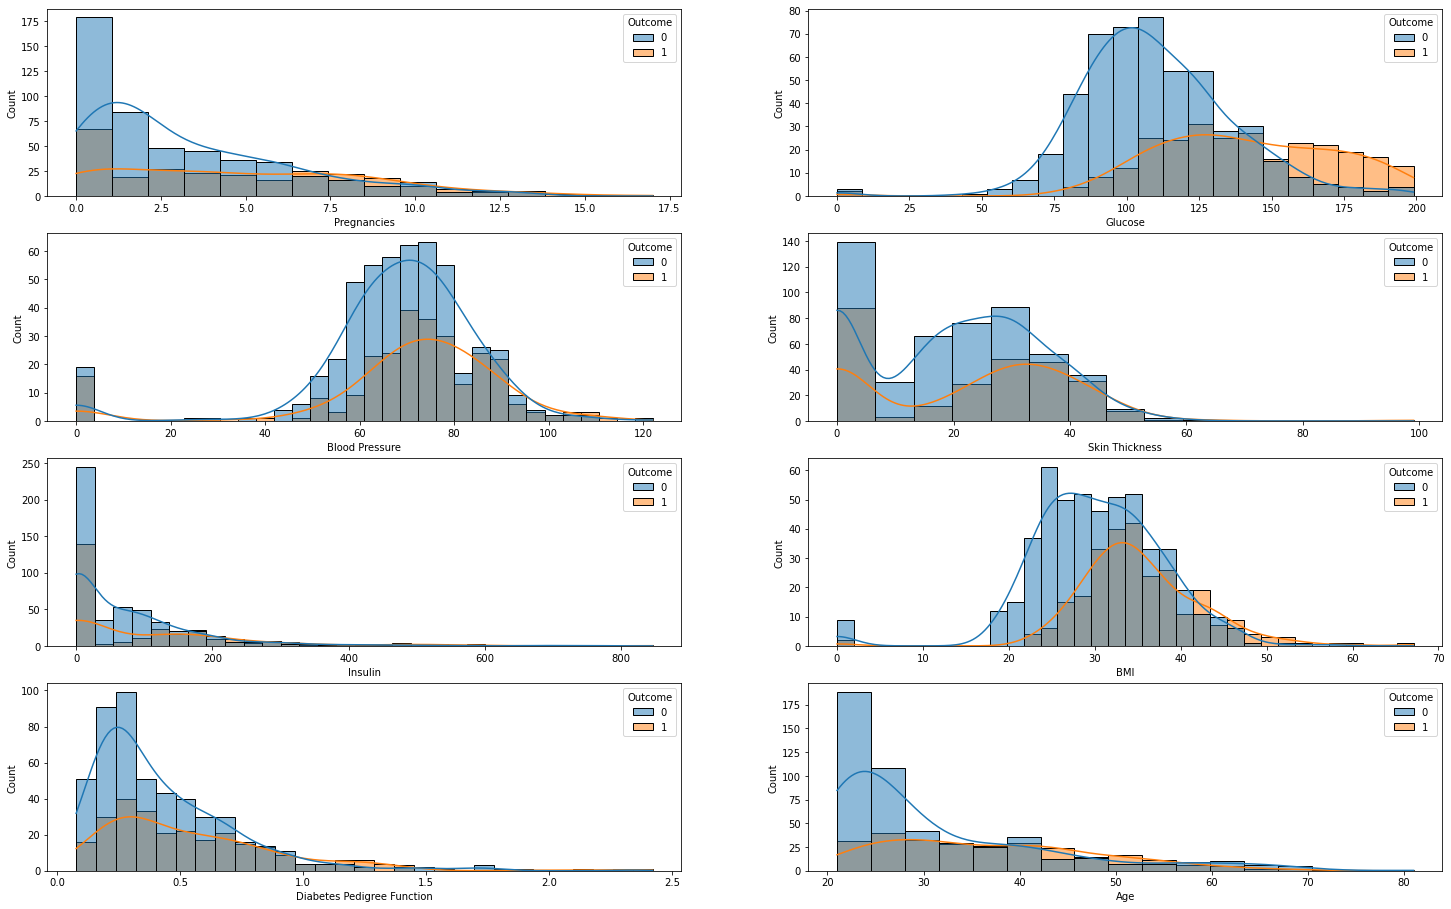

In [13]:
plt.figure(figsize=(25,20))
i=1
for name in feature_names:
    plt.subplot(5,2,i)
    sns.histplot(data=df, x=name, hue="Outcome",kde=True)
    i = i + 1

We can see that quite a few features have large number of observations at zero. Also, it is not logical to have glucose, blood pressure, skin thickness etc. as zero. We can assume that zeros are the missing values and treat them accordingly.
OUt of all features, "Glucose", "BloodPressure", "SkinThickness", "Insulin" and "BMI" are the features that can't have zero values. While "Pregnancy" and "Diabetes pedigree function" can have zero values. 

In [14]:
# We can write Nan instead of 0
zero_value_columns= ["Glucose", "Blood Pressure", "Skin Thickness", "Insulin", "BMI"]
for col in zero_value_columns:
    df[col].replace(0,np.NaN,inplace=True)

In [15]:
# now we can see missing values
df.isnull().sum()

Pregnancies                     0
Glucose                         5
Blood Pressure                 35
Skin Thickness                227
Insulin                       374
BMI                            11
Diabetes Pedigree Function      0
Age                             0
Outcome                         0
dtype: int64

In [16]:
# We can fill in NaN values with a median according to the target. Which means median will be different for outcome=0 and outcome=1. 
# We can also fill the values using a simpler median/mean value. Or can do KNN imputation.
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()),col] = df[df["Outcome"]==0][col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()),col] = df[df["Outcome"]==1][col].median()

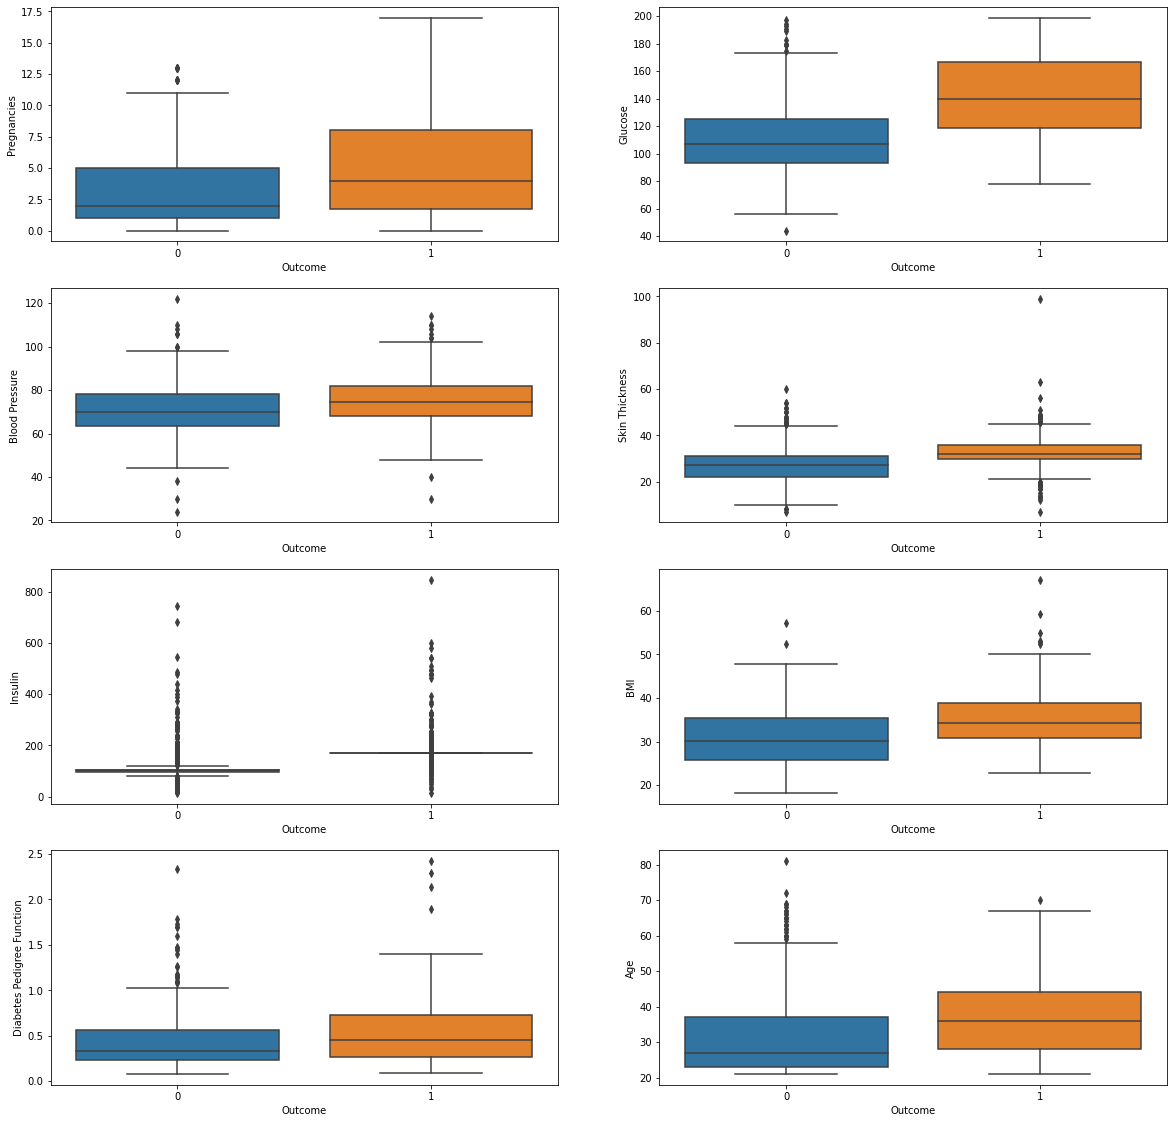

In [17]:
plt.figure(figsize=(20,25))

j=1
for name in feature_names:
    plt.subplot(5,2,j)
    sns.boxplot(x="Outcome",y=name,data=df)
    j = j + 1

The box plots suggest that the outlier values are just extreme values, but are legitimate. Hence no need to replace them with IQR analysis.

In [18]:
#OPTIONAL
#Below code will replace the outlier values with upper/lower quartile range. 
# for name in feature_names:
#     Q1 = df[name].quantile(0.25)
#     Q3 = df[name].quantile(0.75)
#     IQR = Q3-Q1
#     lower = Q1 - 1.5*IQR
#     upper = Q3 + 1.5*IQR
#     if df[(df[name] > upper) |(df[name] < lower) ].any(axis=None): 
#         print (name, "yes")
#     else: print(name, "no")
#     df.loc[(df[name] < lower), name]= lower
#     df.loc[(df[name] > upper), name]= upper

In [19]:
df.groupby('Outcome')[feature_names].mean().reset_index()

,Outcome,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age
0,0,3.298000,110.622000,70.844000,27.170000,117.172000,30.846000,0.429734,31.190000
1,1,4.865672,142.302239,75.272388,32.671642,187.615672,35.398507,0.550500,37.067164


Below are the observations from the box plots and the grouping operation:
- Females with high pregnancies are more likely to get diabetes. 
- Diabetic patients tend to have high glucose, blood pressure, skin thickness compared to non diabetics
- Insulin and BMI increases significantly for diabetic patients.
- Risk of dibetes increases with age.

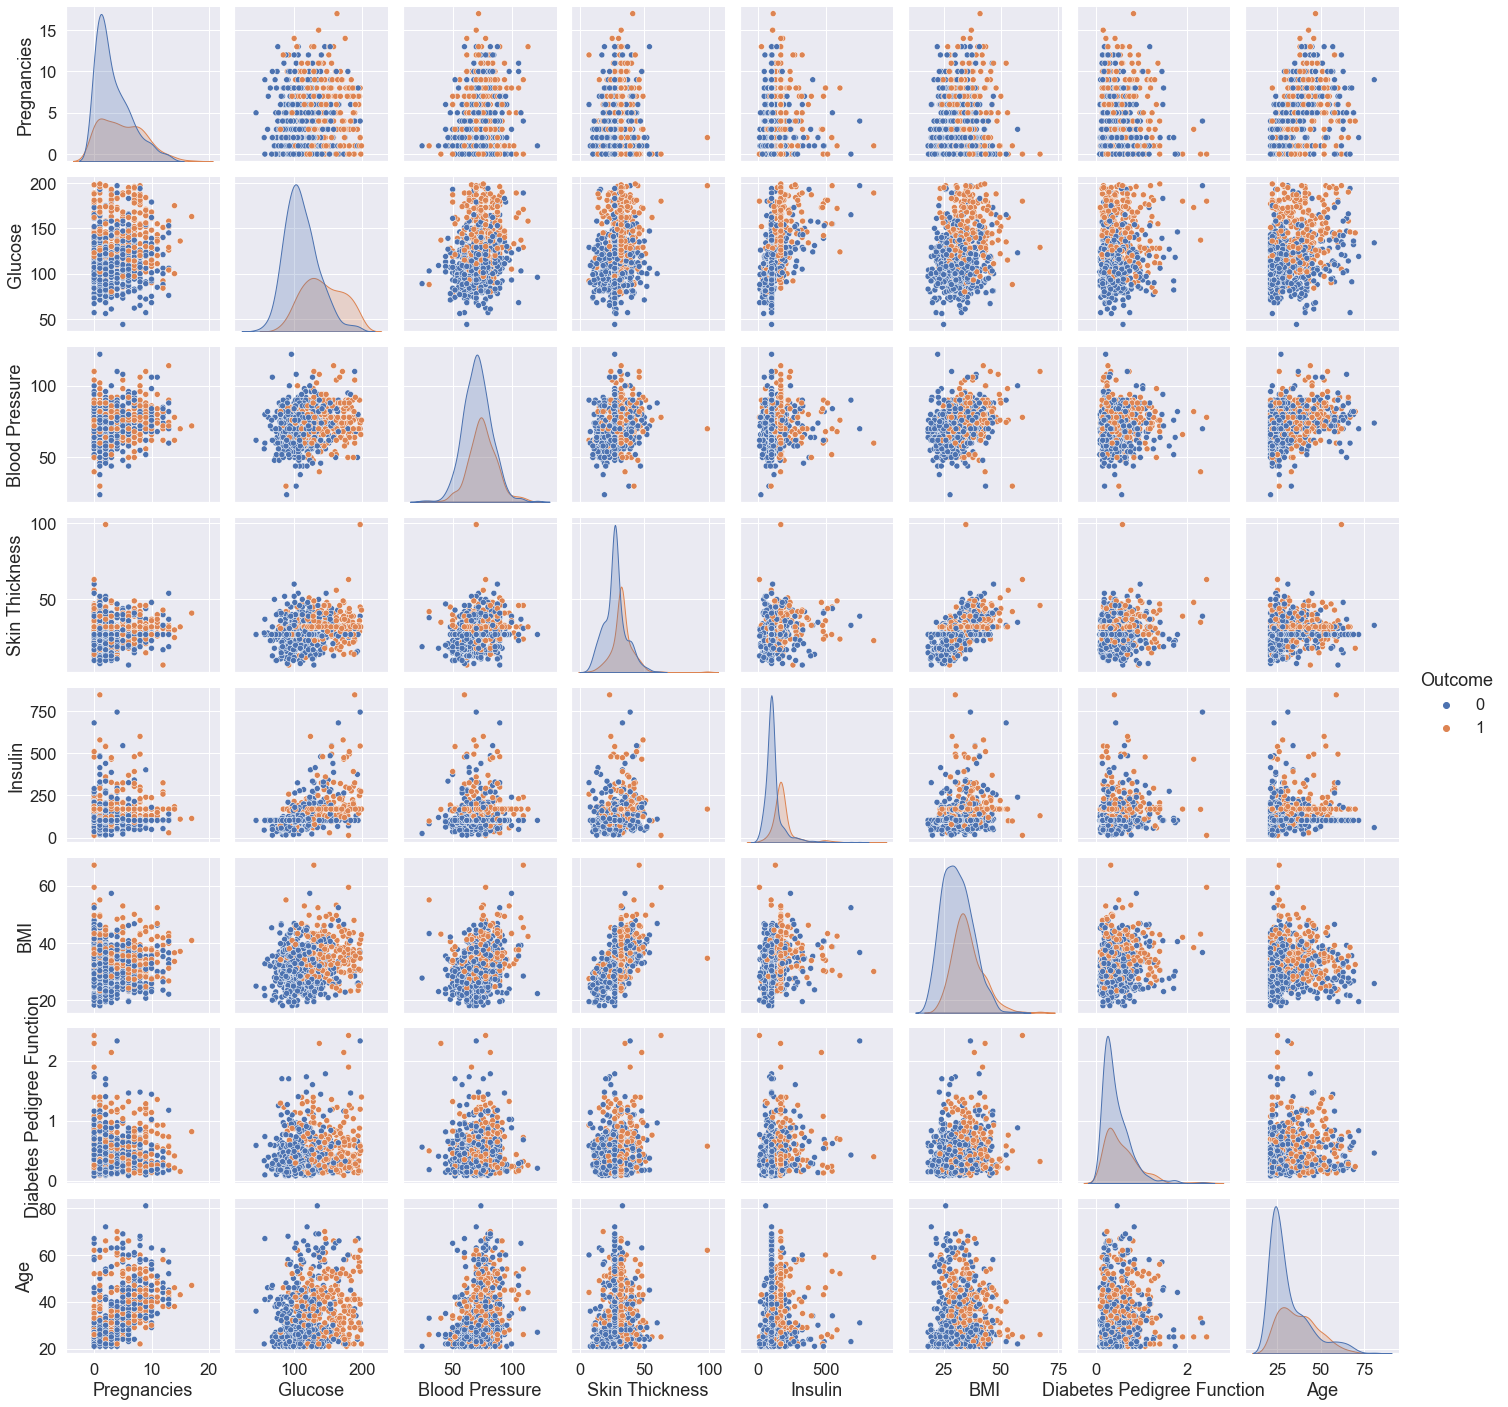

In [20]:
sns.set(font_scale =1.5)
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

Above pairplots show some bivariate relations between independent variables too. For eg. skin thickness vs BMI, insulin vs BMI, Age vs Glucose etc. <br>
Bivariate analysis w.r.t. dependent variable is similar to what we have deduced from the box plots. 

## 1.2 Correlation analysis

<AxesSubplot:>

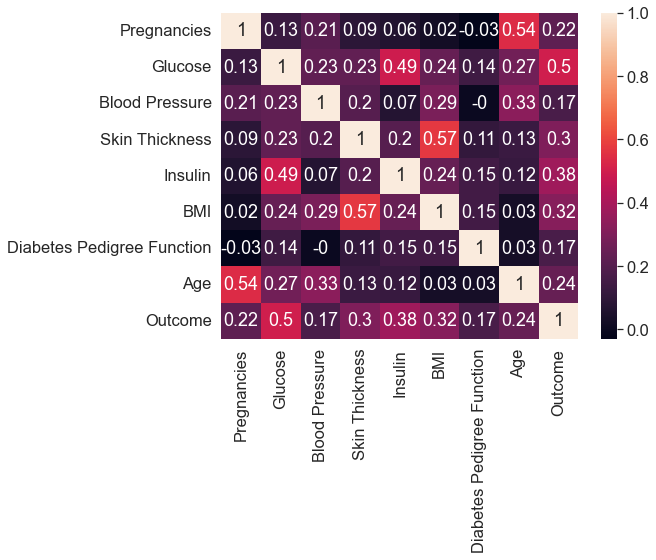

In [21]:
corr= np.round(df.corr(),2)
plt.figure(figsize=(8,6))
sns.heatmap(corr,annot=True)

Variables like Glucose, Insulin, BMI are highly correlated, while Age, Pregnancies, skin thickness are moderately correlated with the outcome variable.

## 1.3 Feature Standartization

In [22]:
x= df.drop('Outcome',axis=1)
y= df[['Outcome']]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)

In [24]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

## 2.1 Linear Model building

Accuracy score:  0.8311688311688312
F1 score:  0.7678571428571429


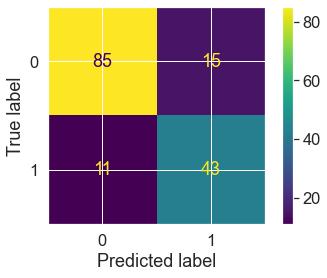

In [25]:
lr= LogisticRegression(class_weight= 'balanced')
lr.fit(x_train_scaled,y_train)
predict_lr= lr.predict(x_test_scaled)
print ("Accuracy score: ",accuracy_score(y_test,predict_lr))
print ("F1 score: ",f1_score(y_test,predict_lr))
cm = confusion_matrix(y_test,predict_lr, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()

## 2.2 Decision tree model building

Accuracy score:  0.8636363636363636
F1 score:  0.8108108108108109


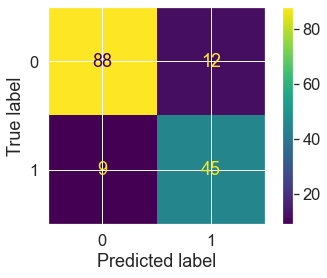

In [26]:
dtc= DecisionTreeClassifier(class_weight= 'balanced')
dtc.fit(x_train_scaled,y_train)
predict_dtc= dtc.predict(x_test_scaled)
print ("Accuracy score: ",accuracy_score(y_test,predict_dtc))
print ("F1 score: ",f1_score(y_test,predict_dtc))
cm = confusion_matrix(y_test,predict_dtc, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dtc.classes_)
disp.plot()

## 2.3 Random Forest model building without tuning

Accuracy score:  0.9155844155844156
F1 score:  0.8785046728971964


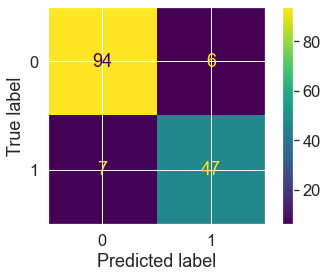

In [27]:
rfc= RandomForestClassifier(class_weight='balanced',random_state=5)
rfc.fit(x_train_scaled,y_train)
predict_rfc= rfc.predict(x_test_scaled)
print ("Accuracy score: ",accuracy_score(y_test,predict_rfc))
print ("F1 score: ",f1_score(y_test,predict_rfc))
cm = confusion_matrix(y_test,predict_rfc, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()

## 2.4 Random Forest model building with hyperparameter tuning

In [29]:
rf_params = {"n_estimators" :[50,100,200,300], 
             "max_features": [3,5,None], 
             "min_samples_split": [2,5,10],
            "max_depth": [5,8,None]}

In [30]:
rf_model = RandomForestClassifier(random_state = 5,class_weight='balanced')

In [31]:
%%time
gs_cv = GridSearchCV(rf_model, rf_params,cv = 10,n_jobs = -1,verbose = 2).fit(x_train_scaled,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
Wall time: 4min 11s


In [35]:
gs_cv.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 5,
 'n_estimators': 200}

In [43]:
#Putting in the best parameteres found from tuning. 
rfc_tuned = RandomForestClassifier(**gs_cv.best_params_,random_state=5)
rfc_tuned.fit(x_train_scaled,y_train)

RandomForestClassifier(max_features=5, min_samples_split=5, n_estimators=200,
                       random_state=5)

Accuracy score:  0.922077922077922
F1 score:  0.8909090909090909


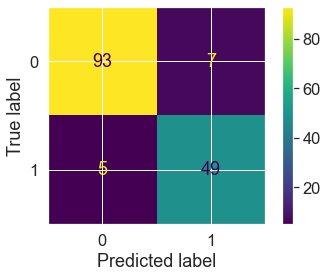

In [37]:
predict_rfc_tuned= rfc_tuned.predict(x_test_scaled)
print ("Accuracy score: ",accuracy_score(y_test,predict_rfc_tuned))
print ("F1 score: ",f1_score(y_test,predict_rfc_tuned))
cm = confusion_matrix(y_test,predict_rfc_tuned,labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=lr.classes_)
disp.plot()
plt.show()

### Above analysis suggests that Random forest classifier gives the best model with tuning method. Accuracy score of 92% and f1 score of 89%

In [38]:
fpr,tpr,thresholds = roc_curve(y_test,predict_rfc_tuned)
auc = roc_auc_score(y_test,predict_rfc_tuned)

#### ROC curve 

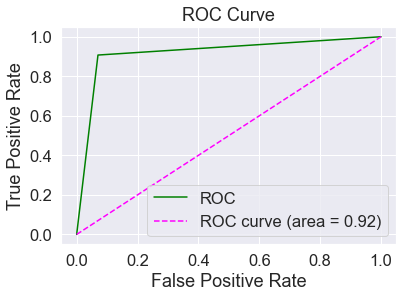

In [39]:
plt.plot(fpr, tpr, color='green', label='ROC')
plt.plot([0, 1], [0, 1], color='magenta', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()